In [98]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [99]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import itertools
from susipop import filter
from susipop import reader
# from IPython.html.widgets import FloatProgress
# from IPython.display import display
# import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp


# Cluster Analysis in SuSi

There are some important functions in susi for cluster analysis. 

In [100]:
path = 'rhor1_phi40_yd10.0/'
dataset = sp.reader.DataSet(path,particles=True, fluid=True)
dataset.load_state(dataset.tlist[-10])

In [101]:
positions = dataset.particles.r
fluid_velocity = dataset.fluid.u
L = dataset.L # Domain size
LEs = dataset.LEs  # Lees-Edwards shift at time dataset.t
LEu = dataset.LEu  # Lees-Edwards velocity

If they are not specified, the above assume their default values, which can be found in susi.wrapper.extract_sim_characteristics()

In [102]:
# sim_chars.keys()

<IPython.core.display.Javascript object>


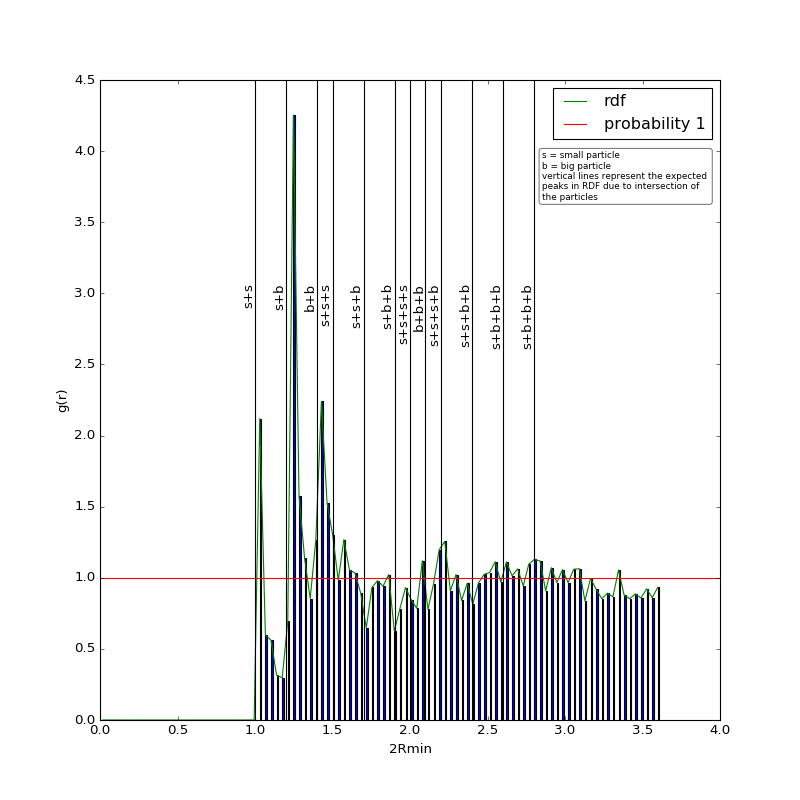

In [148]:
sim_chars = sp.susi.extract_sim_characteristics(dataset)
sim_chars['histogram'] = {'bins': 100, 'range': (0, 2.8376564979553224e-05)}

rdf = sp.spatial.radial_distribution_function(positions,**sim_chars)
plt.figure(figsize=[10,10])
plt.plot(rdf[0]/(2*np.min(sim_chars['radius'])),rdf[1],"g",label="rdf")
plt.bar(rdf[0]/np.min(2*np.min(sim_chars['radius'])),rdf[1],width = 1.0/sim_chars['histogram']['bins'])
plt.axhline(1.0,color="r",label="probability 1")

# s = sim_chars['radius'].min()
# b = sim_chars['radius'].max()

s = 4
b = 11.2/2
import inspect, re
        
def plot_vline(loc, text):
    plt.axvline(loc/float(2*s),color="k")
    plt.text(loc/float(2*s),3,text, ha = 'right',rotation=90)

plot_vline(s+s,"s+s")
plot_vline(s+b,"s+b")
plot_vline(b+b,"b+b")

plot_vline(s+s+s,"s+s+s")
plot_vline(s+s+b,"s+s+b")
plot_vline(s+b+b,"s+b+b")
plot_vline(b+b+b,"b+b+b")

plot_vline(s+s+s+s,"s+s+s+s")
plot_vline(s+s+s+b,"s+s+s+b")
plot_vline(s+s+b+b,"s+s+b+b")
plot_vline(s+b+b+b,"s+b+b+b")
plot_vline(b+b+b+b,"s+b+b+b")

plt.legend()
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(2.85, 4, "s = small particle \nb = big particle \nvertical lines represent the expected \npeaks in RDF due to intersection of \nthe particles"
         , fontsize=8,verticalalignment='top', bbox=props, wrap=True)
plt.xlabel("2Rmin")
plt.ylabel("g(r)")

In [104]:
s = sim_chars['radius'].min()
b = sim_chars['radius'].max()

s = 4
b = 11.2/2

print (2*s)/(2*s),(s+b)/(2*s), (2*b)/(2*s)



1 1.2 1.4
